# Implementation K-nearest Neighbors Algorithm for Prediction of Market Prices for Cars.

The purpose of this project is to practice how to implement the K-nearest Neighbors algorithm for the calculation of market indicators.  The project was made during studying at Dataquest boot camp. 
The initial file was taken from 
URL dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'. 
There were no headers in the initial file, but we can find the names for columns in the documentations. I put the fragment of the documentation into the separate file name.csv. Let us take names of columns from there:


In [359]:
import pandas as pd
import numpy as np
names = pd.read_csv('Name.csv')

In [360]:
names.head()

,Names
0,1. symboling:
1,2. normalized-losses:
2,3. make:
3,4. fuel-type:
4,5. aspiration:


In [361]:
col = []
for ik in range(len(names)):
     name = names.loc[ik]
     name = str(name)[13:32]
     name = name.replace(':','')
     name = name.replace('\nName 25, dt','').strip()
     col.append(name)

In [362]:
print(col)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'me 26, dtype obje']


There is an unnecessary entry at the end, let us get rid of it:

In [363]:
columns = col[:26]
print(columns)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


Now, we can use the list for naming the columns of initial file:

In [364]:
cars =pd.read_csv('imports-85.data', names = columns)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Cleaning the data

These are some missing data marked as "?". We should get rid of the question marks. Columns with a lot of such entries I will drop completely.
The row without indication price I will erase completely. 
If the other columns are missing some entries, let us change them for the mean values of the entire column.

In [365]:
cars['price'][5:15]

5     15250
6     17710
7     18920
8     23875
9         ?
10    16430
11    16925
12    20970
13    21105
14    24565
Name: price, dtype: object

Let us choose the columns with numerical data only:

In [366]:
dig_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
digital_cars = cars[dig_cols]

In [367]:
digital_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [368]:
digital_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


All "?" are changed for NaN values:

In [369]:
digital_cars = digital_cars.replace('?',np.nan)

Some of the columns are still indicated as not of numerical ones, let me fix it: 

In [370]:
dcars = digital_cars.astype(float)

Everything is correct now:

In [371]:
dcars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

Let us check how many absent values do we have in the dataset. The k-nearest neighbor's algorithm can work if there are no missing values in the dataset.

In [372]:
dcars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since the first column has 41 empty entries, it would be a good idea to delete this column completely. 

In [373]:
dig_col = dig_cols[1:]
dcars = dcars[dig_col]

In [374]:
dcars.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


There are still some null values in other colunms. 

In [375]:
dcars.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Let us drop rows where the info on price is absent, 
and change null-values in the other columns for its average value for an entire column:


In [376]:
dcars = dcars.dropna(subset=['price'])
dcars = dcars.fillna(dcars.mean())

In [377]:
dcars.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [378]:
dcars['price'].sum()/len(dcars['price'])

13207.129353233831

Let is normalize each column from 0 to 1:

In [379]:
norm_cars = (dcars[dig_col] - dcars[dig_col].min())/(dcars[dig_col].max() - dcars[dig_col].min())

In [380]:
norm_cars.head()


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


# Price Prediction.

Let us divide the initial set of data into 2 parts: one for training purposes, the rest for the test - prediction of prices - in the ratio of 3:1 train to test sets. Then, we will apply the K-Nearest Neighbors algorithm for the training base. After training the train set, we will apply the algorithm to test part for price prediction. Predicted prices are collected in the 'predictions' variable. rmse is Root Square Mean Error - for estimation of how correct was the prediction.

In [381]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test_5_neigh(dbase,train_col,target_col):    # for default number of neighbours(5), and list of columns.
    shuffled_index = np.random.permutation(dbase.index)
    dbase = dbase.reindex(shuffled_index)
    len_train = int(round(len(dbase)*0.75,0))
    train = dbase[:len_train]
    test = dbase[len_train:]
    knn = KNeighborsRegressor()
    knn.fit(train[train_col], train[target_col])
    predictions = knn.predict(test[train_col])
    rmse_v = mean_squared_error(test[target_col],predictions)**0.5
    return rmse_v 

5 neigh in the name of the function indicates that the number of neighbors we took.  There are 5 neighbors in the standard algorithm by default. 
Let us check the function:


In [382]:
knn_train_test_5_neigh(dcars,dig_col,'price')

428.4882887547806

The previous function calculates Prices using all numerical columns as entry parameters. The next function is modified to calculate using only a single column as initial parameter only.

In [383]:
def knn_train_test_one_K(dbase,train_col,target_col):   # for default number of neighbours(5), and one column ONLY.
    shuffled_index = np.random.permutation(dbase.index)
    dbase = dbase.reindex(shuffled_index)
    len_train = int(round(len(dbase)*0.75,0))
    train = dbase[:len_train]
    test = dbase[len_train:]
    knn = KNeighborsRegressor()
    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    rmse_v = mean_squared_error(test[target_col],predictions)**0.5
    return rmse_v 

The function still works, but the error is huge:

In [384]:
knn_train_test_one_K(dcars,'wheel-base','price')

7448.441778036531

So, let try to find optimal parameters (columns) and the number of neighbors to reduce error as only possible.

# Search for optimal parameters

Let us create a dictionary with the results for root square errors for each column:

In [385]:
rmse_each_column = {}
for col in dig_col:
    rmse_val = knn_train_test_one_K(dcars, col,'price')
    rmse_each_column[col] = rmse_val
print(rmse_each_column)

{'wheel-base': 6509.500625393625, 'length': 4772.164527842685, 'width': 5518.685329822674, 'height': 7166.7948489684, 'curb-weight': 4088.6590559742194, 'engine-size': 2576.8785587217726, 'bore': 7977.205603568206, 'stroke': 8001.88050253189, 'compression-ratio': 5770.92681346766, 'horsepower': 4027.5105792039826, 'peak-rpm': 6092.219353174998, 'city-mpg': 3766.423663689469, 'highway-mpg': 3028.0244903897324, 'price': 393.3077858369957}


Let us go even deeper and calculate the errors using different numbers of neighbors for prediction:

In [386]:
k_values = [1,2,3,4,5,6,7,8,9]
def knn_train_test_one_col_many_k(dbase,train_col,target_col,k_values):    # many neighbours, 1 column
    shuffled_index = np.random.permutation(dbase.index)
    dbase = dbase.reindex(shuffled_index)
    len_train = int(round(len(dbase)*0.75,0))
    train = dbase[:len_train]
    test = dbase[len_train:]
    remse_col = {}
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[train_col]], train[target_col])
        predictions = knn.predict(test[[train_col]])
        rmse_v = mean_squared_error(test[target_col],predictions)**0.5        
        k_rmse[k]=round(rmse_v,5)
    return k_rmse
    

In [387]:
knn_train_test_one_col_many_k(dcars,'wheel-base','price',k_values)
    

{1: 3806.4821,
 2: 4798.89878,
 3: 5064.309,
 4: 5781.42284,
 5: 5727.4858,
 6: 5849.81524,
 7: 6188.46117,
 8: 6525.76471,
 9: 6602.94649}

In [388]:
rmse_each_column_K_nei = {}
for col in dig_col:
    if col !='price':
        rmse_val = knn_train_test_one_col_many_k(dcars, col,'price',k_values)
        rmse_each_column_K_nei[col]=rmse_val
rmse_each_column_K_nei

{'wheel-base': {1: 5742.61114,
  2: 5230.65505,
  3: 5678.78655,
  4: 6227.21969,
  5: 6418.40169,
  6: 6251.63299,
  7: 6123.99549,
  8: 6438.94515,
  9: 6391.16908},
 'length': {1: 4617.20049,
  2: 4036.56328,
  3: 4030.84846,
  4: 4543.88727,
  5: 5252.15953,
  6: 5676.23106,
  7: 5617.44473,
  8: 5332.22545,
  9: 5174.11661},
 'width': {1: 4089.98758,
  2: 3356.62847,
  3: 3429.33832,
  4: 3963.01299,
  5: 4286.46242,
  6: 4280.16896,
  7: 4233.14375,
  8: 4244.05959,
  9: 4411.07531},
 'height': {1: 11130.818,
  2: 12011.90015,
  3: 10089.23915,
  4: 9395.12621,
  5: 9502.6897,
  6: 9560.76,
  7: 9247.22858,
  8: 9308.73319,
  9: 9502.71116},
 'curb-weight': {1: 5291.14022,
  2: 5132.0894,
  3: 4746.57904,
  4: 4048.22635,
  5: 3951.38876,
  6: 3961.13289,
  7: 4037.78067,
  8: 3780.53299,
  9: 3900.2149},
 'engine-size': {1: 3926.53157,
  2: 3411.66171,
  3: 3474.0453,
  4: 3473.06293,
  5: 3494.74974,
  6: 3420.98747,
  7: 3553.495,
  8: 3646.87288,
  9: 3558.97695},
 'bore': {1

The dictionary is cumbersome, but we can visualize it for understanding what is going on here: 

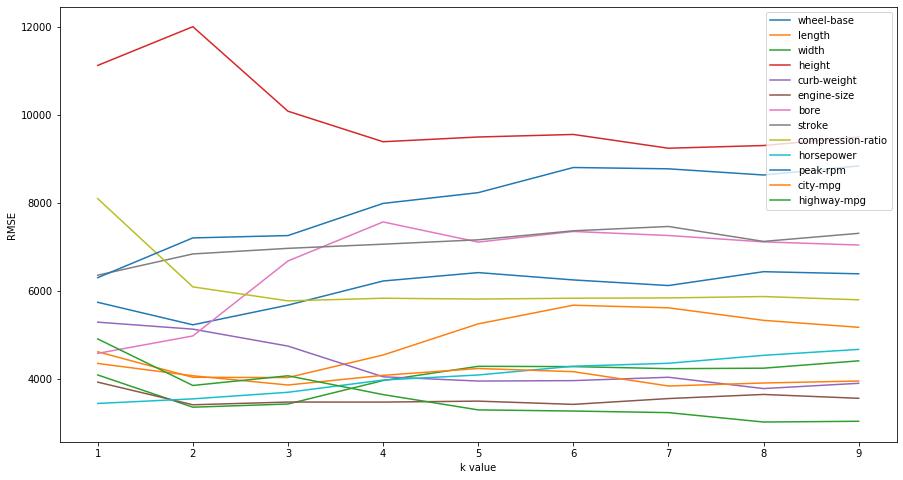

In [389]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
for key, valu in rmse_each_column_K_nei.items():
    lab = key
    x = list(valu.keys())
    y = list(valu.values())
    plt.plot(x,y,label = key )
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()

It is still a mess, but let us choose several columns which could be used for price prediction with the least error. So, we make a list of tuples and sort errors in ascending order.

In [390]:
list_features = list()
for key,val in rmse_each_column_K_nei.items():
    lis = []
    for k,v in val.items():
        lis.append(v)
    meanv = round(np.average(lis),5)
    tupl = (key,meanv)
    print(tupl)
    list_features.append(tupl)
    list_features

('wheel-base', 6055.9352)
('length', 4920.07521)
('width', 4032.65304)
('height', 9972.13402)
('curb-weight', 4316.56502)
('engine-size', 3551.15373)
('bore', 6633.63391)
('stroke', 7075.15108)
('compression-ratio', 6108.00446)
('horsepower', 4066.70754)
('peak-rpm', 8007.92919)
('city-mpg', 4051.91104)
('highway-mpg', 3592.14033)


In [391]:
def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1])  
    return tup  

In [392]:
list_features = Sort_Tuple(list_features)
list_features

[('engine-size', 3551.15373),
 ('highway-mpg', 3592.14033),
 ('width', 4032.65304),
 ('city-mpg', 4051.91104),
 ('horsepower', 4066.70754),
 ('curb-weight', 4316.56502),
 ('length', 4920.07521),
 ('wheel-base', 6055.9352),
 ('compression-ratio', 6108.00446),
 ('bore', 6633.63391),
 ('stroke', 7075.15108),
 ('peak-rpm', 8007.92919),
 ('height', 9972.13402)]

In [393]:
feature1 = [list_features[0][0]]
feature2 = feature1 + [list_features[1][0]]
feature3 = feature2 + [list_features[2][0]]
feature4 = feature3 + [list_features[3][0]]
feature5 = feature4 + [list_features[4][0]]

In [394]:
print(feature1,'\n', feature2, '\n', feature3, '\n', feature4, '\n',feature5)

['engine-size'] 
 ['engine-size', 'highway-mpg'] 
 ['engine-size', 'highway-mpg', 'width'] 
 ['engine-size', 'highway-mpg', 'width', 'city-mpg'] 
 ['engine-size', 'highway-mpg', 'width', 'city-mpg', 'horsepower']


Features 1 to 5 is the list of columns (parameters) that have the highest correlation with the final price (in descending order). 
We can use them for price prediction trying to reduce error as only possible:

In [395]:
features = [feature1,feature2, feature3, feature4, feature5]


In [396]:
two_best = ["curb-weight", "horsepower"]
three_best = ["curb-weight", "horsepower", "length"]
four_best = ["curb-weight", "horsepower", "length", "highway-mpg"]
five_best = ["curb-weight", "horsepower", "length", "highway-mpg", "engine-size"]


In [397]:
for fea in features:
    rmse = knn_train_test_5_neigh(dcars,fea,'price')
    print(fea, '\n', rmse)

['engine-size'] 
 2804.886798428771
['engine-size', 'highway-mpg'] 
 2976.438740508529
['engine-size', 'highway-mpg', 'width'] 
 3138.6167174728425
['engine-size', 'highway-mpg', 'width', 'city-mpg'] 
 4377.82175288122
['engine-size', 'highway-mpg', 'width', 'city-mpg', 'horsepower'] 
 2762.6278172783245


We can see the smallest error we can get if we use 5 parameters. 

Next step: we can experiment with the number of neighbors with the same purpose 
to find the optimum number of them for correct price prediction:

 "engine-size", "highway-mpg", "curb-weight","horsepower".

In [398]:
def knn_train_test_4features_many_neig(dbase,train_col,target_col,k_values):    # many neighbours, 3 or 4 features
    shuffled_index = np.random.permutation(dbase.index)
    dbase = dbase.reindex(shuffled_index)
    len_train = int(round(len(dbase)*0.75,0))
    train = dbase[:len_train]
    test = dbase[len_train:]
    remse_col = {}
    k_rmse = {}
    for k in range(1,k_values+1):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[train_col], train[target_col])
        predictions = knn.predict(test[train_col])
        rmse_v = mean_squared_error(test[target_col],predictions)**0.5        
        k_rmse[k]=round(rmse_v,5)
    return k_rmse
    

In [399]:
knn_train_test_4features_many_neig(dcars, feature4,'price',k_values=35)

{1: 2846.73746,
 2: 2452.96298,
 3: 2500.66042,
 4: 2815.66925,
 5: 3321.48922,
 6: 3435.8301,
 7: 3513.64264,
 8: 3629.80112,
 9: 3522.61962,
 10: 3487.49993,
 11: 3620.85841,
 12: 3788.9155,
 13: 3878.34774,
 14: 3988.3414,
 15: 4038.8186,
 16: 4048.63479,
 17: 4000.3394,
 18: 4237.25241,
 19: 4395.27884,
 20: 4411.91125,
 21: 4506.55031,
 22: 4568.57614,
 23: 4658.60347,
 24: 4713.17962,
 25: 4760.94055,
 26: 4807.11663,
 27: 4829.77177,
 28: 4884.30036,
 29: 4936.62992,
 30: 5030.33293,
 31: 5109.01894,
 32: 5196.03701,
 33: 5285.75207,
 34: 5304.45799,
 35: 5365.64837}

In [400]:
knn_train_test_4features_many_neig(dcars, feature5,'price',k_values=25)

{1: 2650.56931,
 2: 2524.7208,
 3: 2682.38729,
 4: 2644.31361,
 5: 2784.31432,
 6: 2870.44028,
 7: 3059.16359,
 8: 3255.59071,
 9: 3611.2162,
 10: 3828.04161,
 11: 4077.48722,
 12: 4319.24854,
 13: 4473.75094,
 14: 4621.14993,
 15: 4668.94089,
 16: 4755.75453,
 17: 4720.61586,
 18: 4764.73854,
 19: 4813.47354,
 20: 4869.85317,
 21: 4919.95945,
 22: 4984.4891,
 23: 5063.2749,
 24: 5138.43079,
 25: 5212.73187}

In [401]:
fea3 = knn_train_test_4features_many_neig(dcars, feature3,'price',k_values=20)
fea4 = knn_train_test_4features_many_neig(dcars, feature4,'price',k_values=20)
fea5 = knn_train_test_4features_many_neig(dcars, feature5,'price',k_values=20)

In [402]:
rmse_each_4_feature_K_nei = dict()
rmse_each_4_feature_K_nei["3 Features"] = fea3
rmse_each_4_feature_K_nei["4 Features"] = fea4
rmse_each_4_feature_K_nei["5 Features"] = fea5


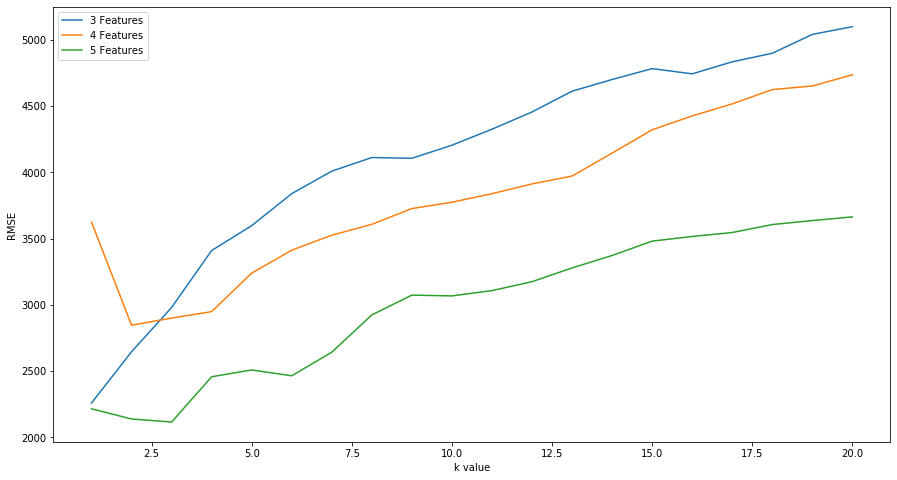

In [403]:
plt.figure(figsize=(15,8))
for key, valu in rmse_each_4_feature_K_nei.items():
    lab = key
    x = list(valu.keys())
    y = list(valu.values())
    plt.plot(x,y,label = key )
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()

We can see the lowest error we can get if we use 3-5 neighbors for 5 features. The result of running the function shows us slightly different results for each permutation of the initial database. But we get the best result rmse = 1900. 

Let us make cross-validation just to check how correct was the choice of the initial set for price prediction:
    

In [404]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dcars[feature5], dcars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))


3 folds:  avg RMSE:  3012.844801642501 std RMSE:  61.44952725480945
5 folds:  avg RMSE:  2862.2411001972714 std RMSE:  83.82273170966755
7 folds:  avg RMSE:  2805.7829284603163 std RMSE:  348.91061912915217
9 folds:  avg RMSE:  2830.393353227079 std RMSE:  681.1528620540874
10 folds:  avg RMSE:  2715.5707564420554 std RMSE:  576.3714901449949
11 folds:  avg RMSE:  2772.933738594246 std RMSE:  857.4886317574585
13 folds:  avg RMSE:  2735.451496179227 std RMSE:  796.8741332501232
15 folds:  avg RMSE:  2670.0670286486284 std RMSE:  918.5099640076639
17 folds:  avg RMSE:  2603.6019343961684 std RMSE:  1073.1402552925629
19 folds:  avg RMSE:  2653.118976802094 std RMSE:  948.5207878483506
21 folds:  avg RMSE:  2546.2917422792298 std RMSE:  1178.6196464282427
23 folds:  avg RMSE:  2554.953659955101 std RMSE:  1162.6391235846836


In [405]:
shuffled_index = np.random.permutation(dcars.index)
dcars = dcars.reindex(shuffled_index)
len_train = int(round(len(dcars)*0.75,0))
train = dcars[:len_train]
test = dcars[len_train:]
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(train[feature5], train['price'])
predictions = knn.predict(test[feature5])
rmse_v = mean_squared_error(test['price'],predictions)**0.5        
print('Root Square Error for prediction prices of cars at k = 2 and 5 chosen features is ', round(rmse_v,2))
rmse_v = mean_squared_error(test['price'],predictions)**0.5        
print(round(rmse_v,2))



Root Square Error for prediction prices of cars at k = 2 and 5 chosen features is  2329.57
2329.57


# Conclusions 

The number of experiments algorithm using different with initial parameters shows us that we can make the most correct prediction of prices using the 5 features (5 columns with different technical parameters) and a small number of neighbors 2 or 3. But the result is not so consistent and depends on the permutation of the initial dataset. Sometimes it shows better results for 4 and even 3 features. But, in my opinion, we would better use more features for lower variability, taking into account more initial parameters, although with some lack of accuracy.

What we can tell for sure, that the algorithm shows better results with a low number of neighbors. The lowest error we can get using this model is rmse = 1900.